In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

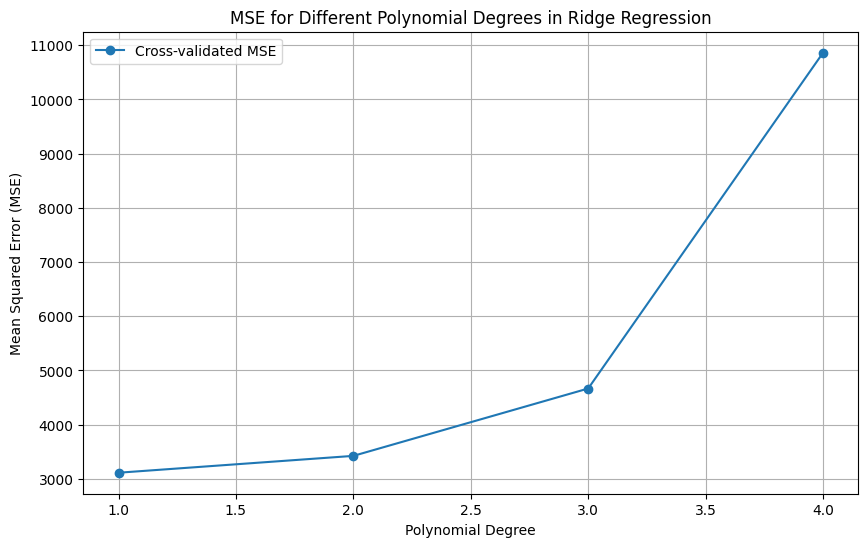

Best alpha for degree 1: 10
Best alpha for degree 2: 100
Best alpha for degree 3: 100
Best alpha for degree 4: 100


In [ ]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Features
num_features = X.shape[1] 

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# function for cross validation with different feature and degree
def eval_poly_alpha_regression(degree, alphas=[0.01, 0.1, 1, 10, 100]):

    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge())
    
    param_grid = {'ridge__alpha': alphas}
    
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_mse = -grid_search.best_score_
    return best_mse, grid_search.best_params_['ridge__alpha']

degree_up = 5
degrees = range(1, degree_up)

# Store MSE values
mse_values = []
best_alphas = []

for d in degrees:
    mse, best_alpha = eval_poly_alpha_regression(d)
    mse_values.append(mse)
    best_alphas.append(best_alpha)

# Plot MSE vs Degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values, marker='o', linestyle='-', label="Cross-validated MSE")

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Different Polynomial Degrees in Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()

for d, alpha in zip(degrees, best_alphas):
    print(f"Best alpha for degree {d}: {alpha}")
